# Init

In [4]:
!pip install shap

In [5]:
import pickle
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import shap
from sklearn.model_selection import train_test_split
import pandas as pd

In [6]:
with open('pickle/df_target.p', 'rb') as file:
    df_target = pickle.load(file)
df_target.head()

,text,target
0,programa treinamento jornalismo agroindústria ...,6
1,ofício enviado sergio presidente michel esquiv...,3
2,governador sérgio cabral transferido complexo ...,6
3,aplausos federal sergio responsável operação i...,5
4,executivo empreiteira odebrecht afirmou acordo...,5


In [7]:
with open('pickle/tfidf.p', 'rb') as file:
    tfidf = pickle.load(file)

# TSNE

In [8]:
X = df_target.drop(columns=['target'])
y = df_target['target']

In [9]:
tfidf_matrix = tfidf.transform(X['text'])
X_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

In [10]:
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X_tfidf)

In [11]:
X_tsne

array([[ -6.521252, -82.857   ],
       [ 69.29662 ,  23.434542],
       [ 42.37579 ,  33.55594 ],
       ...,
       [-39.820602, -72.44176 ],
       [-78.919655,  19.922842],
       [-34.163242, -24.24911 ]], dtype=float32)

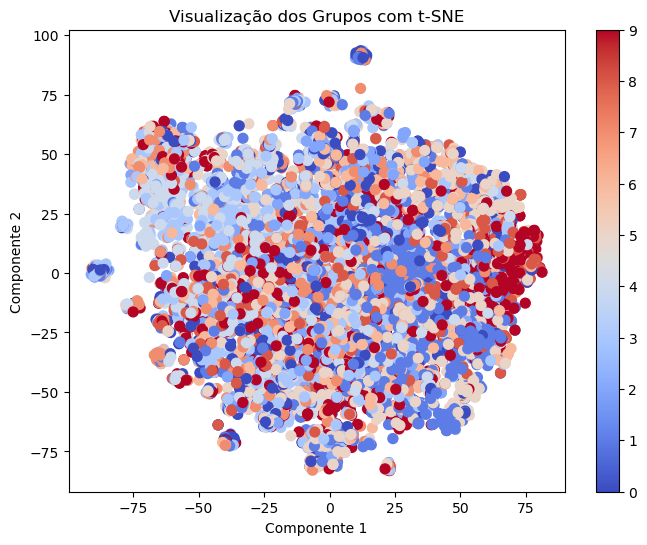

In [12]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='coolwarm', s=50)

# Adicionando uma barra de cores para indicar os clusters
plt.colorbar(scatter)
plt.title('Visualização dos Grupos com t-SNE')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.show()

# SHAP

In [13]:
with open('pickle/model_classifier.p', 'rb') as file:
    model_classifier = pickle.load(file)

In [14]:
X = df_target.drop(columns=['target'])
y = df_target['target']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
x_train_tfidf = tfidf.transform(x_train['text'])
#x_train_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

x_test_tfidf = tfidf.transform(x_test['text'])
#x_test_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

In [17]:
explainer = shap.LinearExplainer(model_classifier, x_train_tfidf)

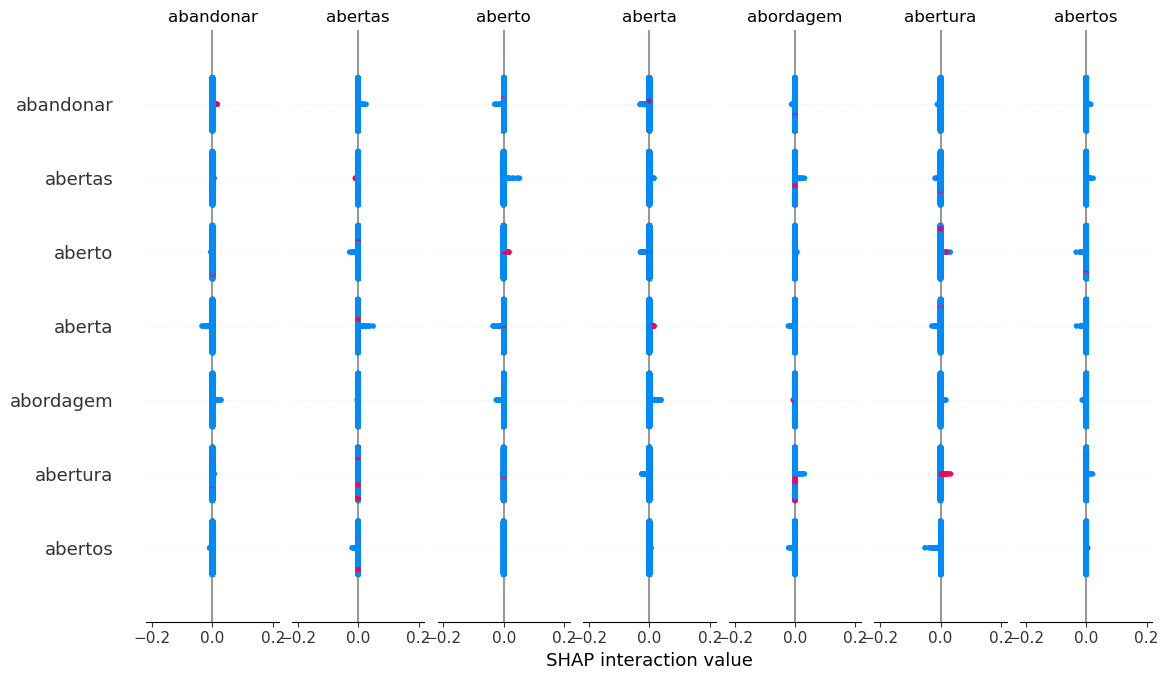

In [18]:
shap.summary_plot(
    explainer(x_test_tfidf), 
    x_test_tfidf.toarray(),
    feature_names=tfidf.get_feature_names_out()
)

In [19]:
shap.initjs()

In [20]:
shap_values_test = explainer(x_test_tfidf)

In [21]:
shap.force_plot(
    explainer.expected_value,
    shap_values_test.values[0, :],
    x_test_tfidf.toarray()[0, :]
)

TypeError: In v0.20, force plot now requires the base value as the first parameter! Try shap.plots.force(explainer.expected_value, shap_values) or for multi-output models try shap.plots.force(explainer.expected_value[0], shap_values[..., 0]).